In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\ParisHousing.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
## Independent / Dependent variables 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

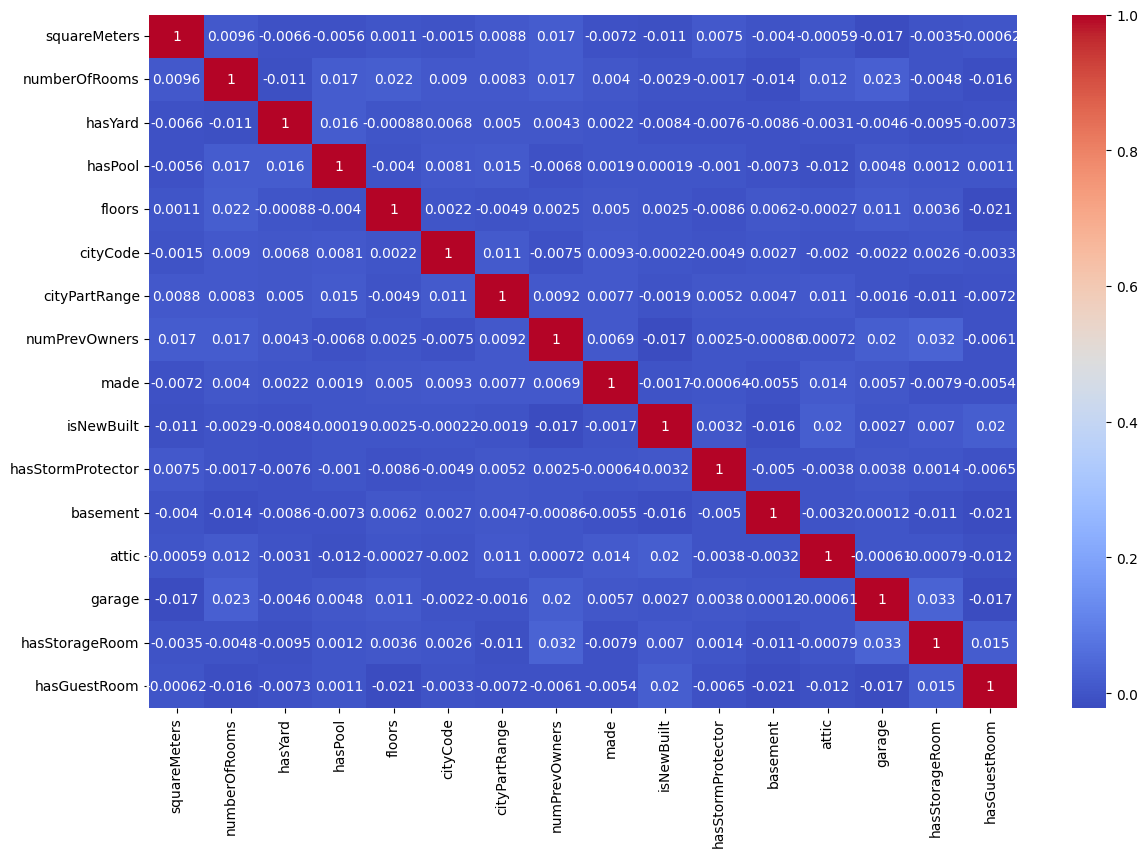

In [9]:
plt.figure(figsize=(14, 9))
sb.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

In [10]:
## Checking the significance
est = sm.OLS(y, X)
res = est.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.759e+09
Date:                Sat, 29 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:17:55   Log-Likelihood:                         -89669.
No. Observations:               10000   AIC:                                  1.794e+05
Df Residuals:                    9984   BIC:                                  1.795e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [12]:
X_new = X.drop(['numberOfRooms', 'cityCode', 'numPrevOwners', 'basement', 'attic', 'garage', 
            'hasStorageRoom', 'hasGuestRoom'], axis=1)
X_new.head()

,squareMeters,hasYard,hasPool,floors,cityPartRange,made,isNewBuilt,hasStormProtector
0,75523,0,1,63,3,2005,0,1
1,80771,1,1,98,8,2015,1,0
2,55712,0,1,19,6,2021,0,0
3,32316,0,0,6,10,2012,0,1
4,70429,1,1,90,3,1990,1,0


In [27]:
## Variance Inflation Factor
def find_vif(xv):
    vif = pd.DataFrame()
    vif['variable'] = xv.columns
    vif['vif'] = [variance_inflation_factor(xv.values, i) for i in range(xv.shape[1])]
    return vif

In [30]:
xv = X_new
find_vif(xv)

## when 2 variables are highly correlated then we remove one

,variable,vif
0,squareMeters,4.004661
1,hasYard,2.036298
2,hasPool,1.988266
3,floors,4.029557
4,cityPartRange,4.683180
5,made,14.700822
6,isNewBuilt,1.996738
7,hasStormProtector,1.999996


In [42]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=10)

In [43]:
## Train w.r.t linearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

<Axes: xlabel='Actual', ylabel='Predicted'>

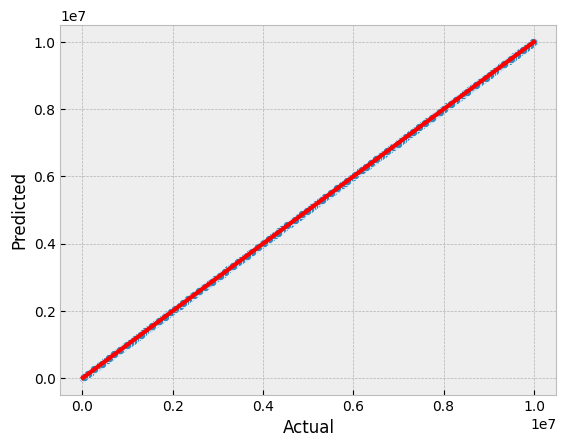

In [44]:
y_predict_lr = lr.predict(X_test)

final = pd.DataFrame(np.c_[y_test, y_predict_lr], columns=['Actual', 'Predicted'])

plt.style.use('bmh')
sb.scatterplot(data = final, x = 'Actual', y = 'Predicted')
sb.regplot(data = final, x = 'Actual', y = 'Predicted', scatter=False, color = 'red')

In [45]:
print("The accuracy score is ", lr.score(X_test, y_test))
print("R^2 is : ", r2_score(y_test, y_predict_lr))
print("Mean Absolute Error is : ", mean_absolute_error(y_test, y_predict_lr))
print("Mean Squared Error is  : ", mean_squared_error(y_test, y_predict_lr))
print("Root Mean Squared Error is  : ", np.sqrt(mean_squared_error(y_test, y_predict_lr)))

The accuracy score is  0.9999995463010508
R^2 is :  0.9999995463010508
Mean Absolute Error is :  1510.1762019794185
Mean Squared Error is  :  3731583.5935200257
Root Mean Squared Error is  :  1931.7307248993131


In [40]:
## Our model is Best, there is no need of ridge and lasso because it is performing best on 
## both train and test data

<h3>Ridge</h3>

In [46]:
rdg = Ridge(alpha=0.1)
rdg.fit(X_train, y_train)

r_predict = rdg.predict(X_test)


print("The accuracy score is ", rdg.score(X_test, y_test))
print("R^2 is : ", r2_score(y_test, r_predict))
print("Mean Absolute Error is : ", mean_absolute_error(y_test, r_predict))
print("Mean Squared Error is  : ", mean_squared_error(y_test, r_predict))
print("Root Mean Squared Error is  : ", np.sqrt(mean_squared_error(y_test, r_predict)))

The accuracy score is  0.9999995463002098
R^2 is :  0.9999995463002098
Mean Absolute Error is :  1510.1779873296362
Mean Squared Error is  :  3731590.5102362954
Root Mean Squared Error is  :  1931.73251518845


<h3>Lasso</h3>

In [47]:
lss = Lasso(alpha=0.2)
lss.fit(X_train, y_train)

l_predict = lss.predict(X_test)

print("The accuracy score is ", lss.score(X_test, y_test))
print("R^2 is : ", r2_score(y_test, l_predict))
print("Mean Absolute Error is : ", mean_absolute_error(y_test, l_predict))
print("Mean Squared Error is  : ", mean_squared_error(y_test, l_predict))
print("Root Mean Squared Error is  : ", np.sqrt(mean_squared_error(y_test, l_predict)))

The accuracy score is  0.9999995462950025
R^2 is :  0.9999995462950025
Mean Absolute Error is :  1510.180616541489
Mean Squared Error is  :  3731633.3392948075
Root Mean Squared Error is  :  1931.7436008163215
